In [39]:
import matplotlib as plt 
from matplotlib import pyplot as plt
import pandas as pd  
import numpy as np 
import numpy.random as nr
import seaborn as sns  
import matplotlib as plt 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import scale 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import linear_model
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import sklearn.decomposition as skde
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_auc_score, roc_curve

%matplotlib inline

## Importing the dataset.

In [4]:
data = pd.read_excel('SomervilleHapinnessSurvey.xlsx')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns)) 

(143, 7)
['D', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6']


## Data types.

In [5]:
data.dtypes

D     int64
X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
dtype: object

## Pairwise correlation coefficients

In [6]:
data.corr(method='pearson', min_periods=1)

,D,X1,X2,X3,X4,X5,X6
D,1.000000,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729
X1,0.312740,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521
X2,0.019368,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546
X3,0.163639,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006
X4,0.113356,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151
X5,0.206685,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402
X6,0.220729,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000


## We get a count of the happy versus not happy individuals.

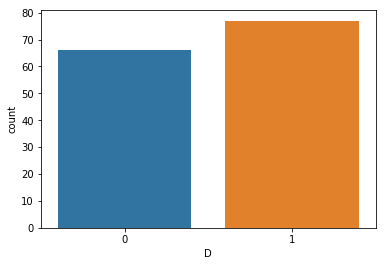

In [7]:
sns.countplot(x = 'D', data = data)  

## As we can see above we have more people that are happy than those who are not. 

## Next we will create a numpy array of the features and label.

In [9]:
Features = np.array(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']])
Labels =  np.array(data[['D']])   

In [13]:
## Now we will partition the dataset into training and test datasets.

In [12]:
# Split the dataset into test and training set
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 29)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## We do the zscore standardization of the dataset.

In [30]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [31]:
#Construct the logistic regression model.
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train) 
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.25357332]
[[ 0.56593146  0.00936893  0.1049353  -0.04827793  0.1341377   0.225994  ]]


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Now we do predictions using our test dataset.

In [32]:
y_pred = logistic_mod.predict(X_test)
probabilities = logistic_mod.predict_proba(X_test) 

In [33]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 0, 16],
       [ 0, 13]], dtype=int64)

## Plotting the ROC and other model performance metrics.

                 Confusion matrix
                 Score positive    Score negative
Actual positive         0                16
Actual negative         0                13

Accuracy        0.45
AUC             0.60
Macro precision 0.22
Macro recall    0.50
 
           Positive      Negative
Num case       16            13
Precision    0.00          0.45
Recall       0.00          1.00
F1           0.00          0.62


C:\Users\Amit Ghosh.SFH-315-0605\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


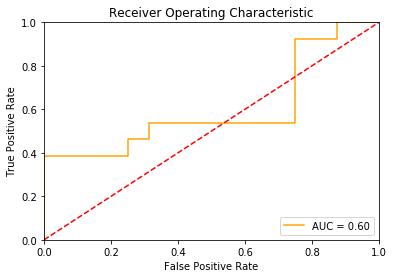

In [35]:
#Evaluate the model
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    

print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)    